In [1]:
import cv2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data/clean_data_1.csv')

In [3]:
data.head()

,Path,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
0,CheXpert-v1.0-small/train/patient00001/study1/...,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,0.0,1.0,0.0,1.0,0.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,0.0,0.0,0.0,0.0,0.0
3,CheXpert-v1.0-small/train/patient00003/study1/...,0.0,1.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/train/patient00004/study1/...,0.0,0.0,0.0,0.0,0.0


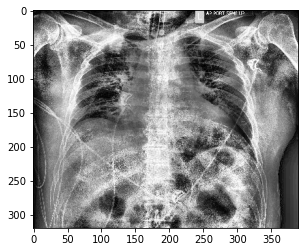

In [27]:
image = cv2.imread('D:\Graduation Project\Data\\'+data.iloc[10, 0], 0)

clahe = cv2.createCLAHE(clipLimit=10)
image = clahe.apply(image)*0.75

image = image.astype(np.float32)
plt.imshow(image, cmap='gray');

# Some Investigation

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [7]:
all_data = pd.read_csv(r'D:\Graduation Project\Data\CheXpert-v1.0-small\train.csv')

In [13]:
data_train, val_test = train_test_split(all_data, test_size=0.2, random_state=42)
data_val, data_test = train_test_split(val_test, test_size=0.5, random_state=42)

In [16]:
all_data.iloc[:, 1:].sum(axis=0)

Cardiomegaly        23510.0
Edema               61588.0
Consolidation       13205.0
Atelectasis         60060.0
Pleural Effusion    76868.0
dtype: float64

In [19]:
data_train.iloc[:, 1:].sum(axis=0)

Cardiomegaly        18804.0
Edema               49336.0
Consolidation       10607.0
Atelectasis         47973.0
Pleural Effusion    61617.0
dtype: float64

In [8]:
all_data = all_data[all_data['Frontal/Lateral']=='Frontal'].copy()

In [9]:
all_data.reset_index(inplace=True, drop=True)

In [10]:
all_data.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


# Analysis of clean data

In [1]:
import numpy as np
import pandas as pd

# for fun
from termcolor import colored

In [2]:
def get_clean(data):
    data.loc[:, data.columns[5:]] = data.loc[:, data.columns[5:]].fillna(0)
    zeros = ['Cardiomegaly', 'Consolidation', 'Pleural Effusion']
    data.loc[:, zeros] = data.loc[:, zeros].replace({-1:0})
    ones = ['Edema', 'Atelectasis']
    data.loc[:, ones] = data.loc[:, ones].replace({-1:1})

    data = data[['Path', 'Frontal/Lateral', 'Cardiomegaly', 'Edema', 'Consolidation', 
                   'Atelectasis', 'Pleural Effusion']].copy() 
    
    return data

def get_stats(data):
    print(colored(f"for clean_{data}:", 'blue'))
    print('='*30)
    
    # not clean
    not_clean = pd.read_csv(f'../Data/Final Data/clean data/not_clean_{data}.csv')
    print(f"{colored(not_clean.shape[0], 'red')} damaged images have been removed")
    
    # clean
    clean = pd.read_csv(f'../Data/Final Data/clean data/clean_{data}.csv')
    clean = get_clean(clean)
    
    print('-'*40)
    print(clean.iloc[:, 2:].sum(axis=0))
    
    print('-'*40)
    at_car_inter_mask = (clean['Atelectasis'] == 1)&(clean['Cardiomegaly'] == 1)
    at_car_inter_num   = clean.loc[at_car_inter_mask, :].shape[0]
    print(f"There are {colored(at_car_inter_num, 'magenta')} images that have both {colored('Atelectasis', on_color='on_yellow')} and {colored('Cardiomegaly', on_color='on_yellow')}")
    
    print('-'*60)
    clean['num_inter'] = clean.iloc[:, 2:].sum(axis=1)
    print(clean['num_inter'].value_counts())

In [5]:
get_stats(2)

for clean_2:
138 damaged images have been removed
----------------------------------------
Cardiomegaly        26978.0
Edema               65198.0
Consolidation       14777.0
Atelectasis         67071.0
Pleural Effusion    86127.0
dtype: float64
----------------------------------------
There are 8054 images that have both Atelectasis and Cardiomegaly
------------------------------------------------------------
1.0    79937
0.0    66089
2.0    54989
3.0    18976
4.0     3117
5.0      168
Name: num_inter, dtype: int64


In [4]:
get_stats(4)

for clean_4:
302 damaged images have been removed
----------------------------------------
Cardiomegaly        26960.0
Edema               65164.0
Consolidation       14760.0
Atelectasis         67026.0
Pleural Effusion    86061.0
dtype: float64
----------------------------------------
There are 8051 images that have both Atelectasis and Cardiomegaly
------------------------------------------------------------
1.0    79866
0.0    66043
2.0    54956
3.0    18963
4.0     3116
5.0      168
Name: num_inter, dtype: int64


# Clean_4 not inter

In [14]:
clean_4 = pd.read_csv(f'../Data/Final Data/clean data/clean_4.csv')

clean_4 = get_clean(clean_4)

mask = (clean_4['Atelectasis'] == 1)&(clean_4['Cardiomegaly'] == 1)
clean_4_no_inter = clean_4.loc[~mask, :]

clean_4_no_inter.shape

(215061, 7)

In [15]:
clean_4_no_inter.to_csv('clean_4_noi.csv', index=False)

# New clean

In [6]:
clean_4 = pd.read_csv(f'../Data/Final Data/clean data/clean_4.csv')
clean_4 = get_clean(clean_4)

clean_5 = pd.read_csv(f'../Data/Final Data/clean data/clean_5.csv')
clean_5 = get_clean(clean_5)

In [7]:
not_car_clean_4 = clean_4[clean_4['Cardiomegaly'] != 1].copy()
car_clean_5 = clean_5[clean_5['Cardiomegaly'] == 1].copy()

In [8]:
new_clean = pd.concat([not_car_clean_4, car_clean_5])

new_clean.shape

(220963, 7)

In [9]:
new_clean.to_csv('new_clean_r.csv', index=False)

# New clean no inter

In [9]:
mask = (new_clean['Atelectasis'] == 1)&(new_clean['Cardiomegaly'] == 1)
new_clean_no_inter = new_clean.loc[~mask, :]

new_clean_no_inter.shape

(215061, 7)

In [10]:
new_clean_no_inter.to_csv('new_clean_noi.csv', index=False)

# clean_4 no 5

In [11]:
clean_4 = pd.read_csv(f'../Data/Final Data/clean data/clean_4.csv')
clean_4 = get_clean(clean_4)

mask = clean_4.iloc[:, 2:].sum(axis=1) == 5
clean_4_no_5 = clean_4.loc[~mask, :]

clean_4_no_5.shape

(222944, 7)

In [12]:
clean_4_no_5.to_csv('clean_4_no_5.csv', index=False)

# clean_4 no 5 + ni

In [16]:
mask = clean_4_no_inter.iloc[:, 2:].sum(axis=1) == 5

clean_4_no5_noi = clean_4_no_inter.loc[~mask, :]

clean_4_no5_noi.shape

(215061, 7)

In [17]:
clean_4_no5_noi.to_csv('clean_4_no5_noi.csv', index=False)

# Clean_2 not inter

In [4]:
clean_2 = pd.read_csv(f'../Data/Final Data/clean data/clean_2.csv')

clean_2 = get_clean(clean_2)

mask = (clean_2['Atelectasis'] == 1)&(clean_2['Cardiomegaly'] == 1)
clean_2_no_inter = clean_2.loc[~mask, :]

clean_2_no_inter.shape

(215222, 7)

In [5]:
clean_2_no_inter.to_csv('clean_2_noi.csv', index=False)

# New clean

In [10]:
clean_2 = pd.read_csv(f'../Data/Final Data/clean data/clean_2.csv')
clean_2 = get_clean(clean_2)

clean_5 = pd.read_csv(f'../Data/Final Data/clean data/clean_5.csv')
clean_5 = get_clean(clean_5)

not_car_clean_2 = clean_2[(clean_2['Cardiomegaly'] != 1)&((clean_2['Atelectasis'] != 1))].copy()
car_clean_5 = clean_5[(clean_5['Cardiomegaly'] == 1)|((clean_5['Atelectasis'] == 1))].copy()

new_clean = pd.concat([not_car_clean_2, car_clean_5])

new_clean.shape

(216940, 7)

In [11]:
new_clean.to_csv('new_clean_r2.csv', index=False)

In [12]:
# clean_2 no 5

clean_2 = pd.read_csv(f'../Data/Final Data/clean data/clean_2.csv')
clean_2 = get_clean(clean_2)

mask = clean_2.iloc[:, 2:].sum(axis=1) == 5
clean_2_no_5 = clean_2.loc[~mask, :]

clean_2_no_5.shape

(223108, 7)

In [13]:
clean_2_no_5.to_csv('clean_2_no_5.csv', index=False)

In [14]:
# clean_2 no 5 + ni

mask = clean_2_no_inter.iloc[:, 2:].sum(axis=1) == 5

clean_2_no5_noi = clean_2_no_inter.loc[~mask, :]

clean_2_no5_noi.shape

(215222, 7)

In [15]:
clean_2_no5_noi.to_csv('clean_2_no5_noi.csv', index=False)

# Mask

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = plt.imread(r'C:\Users\Ahmed Simeda\Desktop\Consolidation_188.jpg')

In [55]:
# Read the original image

# img_gray = cv2.imread(r'C:\Users\Ahmed Simeda\Desktop\Consolidation_188.jpg', 0)

# img_gray[img_gray<80] = 0
# img_gray[img_gray>80] = 255

# # Canny Edge Detection

# edges = cv2.Canny(image=img_gray, threshold1=40, threshold2=60) # Canny Edge Detection

# # Display Canny Edge Detection Image

# cv2.imshow('Canny Edge Detection', edges)

# cv2.waitKey(0)

# cv2.destroyAllWindows()

In [150]:
img_gray = cv2.imread(r'C:\Users\Ahmed Simeda\Desktop\view1_frontal_2.jpg', 0)

In [151]:
filt = img_gray.copy()
filt[filt<80], filt[filt>80] = 0, 255

In [152]:
filt_comp = ~filt

In [153]:
zeco_filt = filt.copy()
zeco_filt[zeco_filt==255] = 1

In [154]:
cv2.imshow('Canny Edge Detection', filt_comp)

cv2.waitKey(0)

cv2.destroyAllWindows()

In [155]:
out = img_gray*zeco_filt
out = cv2.resize(out, dsize=(224, 224), interpolation=cv2.INTER_AREA)

height, width = out.shape
cropped_out = out[22:201, 22:201]

In [156]:
cv2.imshow('Canny Edge Detection', cropped_out)

cv2.waitKey(0)

cv2.destroyAllWindows()

# Test Gen

In [1]:
import cv2

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
from scipy.linalg import qr
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('../Data/Final Data/clean data/clean_2.csv')

In [82]:
image = cv2.imread('D:\Graduation Project\Data\\'+data.iloc[1000, 0], 0)

In [83]:
image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_AREA)

In [8]:
def new_fourier(image):
    f = cv2.dft(image.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
    f_shifted = np.fft.fftshift(f)
    filtered_real = top_bottom(f_shifted[:,:,1])
    filtered_img  = top_bottom(f_shifted[:,:,0])
    f_complex = filtered_img*1j + filtered_real
    f_filtered_shifted = np.fft.fftshift(f_complex)
    inv_img = np.fft.ifft2(f_filtered_shifted)
    filtered_img = np.abs(inv_img)
    filtered_img -= filtered_img.min()
    filtered_img = filtered_img*255 / filtered_img.max()
    filtered_img = filtered_img.astype(np.uint8)
    
    return filtered_img

In [14]:
def top_bottom(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    # Top Hat Transform
    topHat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    # Black Hat Transform
    blackHat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
    #Result
    filtered_img = image + topHat - blackHat
    
    return filtered_img

In [52]:
def clahe(image):
    clahe = cv2.createCLAHE()
    clahe_im = clahe.apply(image)

    return clahe_im

In [56]:
def godec(X, rank=1, card=None, iterated_power=1, max_iter=100, tol=0.001):
        i = 1
        RMSE = []
        card = np.prod(X.shape) if card is None else card

        X = X.T if(X.shape[0] < X.shape[1]) else X
        m, n = X.shape

        # Initialization of L and S
        L = X
        S = np.zeros(X.shape)
        LS = np.zeros(X.shape)

        while True:
            # Update of L
            Y2 = np.random.randn(n, rank)
            for i in range(iterated_power):
                Y1 = L.dot(Y2)
                Y2 = L.T.dot(Y1)
            Q, R = qr(Y2, mode='economic')
            L_new = (L.dot(Q)).dot(Q.T)

            # Update of S
            T = L - L_new + S
            L = L_new
            T_vec = T.reshape(-1)
            S_vec = S.reshape(-1)
            idx = abs(T_vec).argsort()[::-1]
            S_vec[idx[:card]] = T_vec[idx[:card]]
            S = S_vec.reshape(S.shape)

            # Reconstruction
            LS = L + S

            # Stopping criteria
            error = np.sqrt(mean_squared_error(X, LS))
            RMSE.append(error)

            #print("iter: ", iter, "error: ", error)
            if (error <= tol) or (i >= max_iter):
                break
            else:
                i += 1

        return L, S, LS, RMSE

In [69]:
def proposed_1(image):
    _, image, _, _ = godec(image)

    f = cv2.dft(image.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
    f_shifted = np.fft.fftshift(f)
    filtered_real = top_bottom(f_shifted[:,:,1])
    filtered_img  = top_bottom(f_shifted[:,:,0])
    f_complex = filtered_img*1j + filtered_real
    f_filtered_shifted = np.fft.fftshift(f_complex)
    inv_img = np.fft.ifft2(f_filtered_shifted)
    filtered_img = np.abs(inv_img)
    filtered_img -= filtered_img.min()
    filtered_img = filtered_img*255 / filtered_img.max()
    filtered_img = filtered_img.astype(np.uint8)
    
    filtered_img = clahe(filtered_img)
    return filtered_img


def proposed_2(image):
    #image = clahe(image)

    f = cv2.dft(image.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
    f_shifted = np.fft.fftshift(f)
    filtered_real = top_bottom(f_shifted[:,:,1])
    filtered_img  = top_bottom(f_shifted[:,:,0])
    f_complex = filtered_img*1j + filtered_real
    f_filtered_shifted = np.fft.fftshift(f_complex)
    inv_img = np.fft.ifft2(f_filtered_shifted)
    filtered_img = np.abs(inv_img)
    filtered_img -= filtered_img.min()
    filtered_img = filtered_img*255 / filtered_img.max()
    filtered_img = filtered_img.astype(np.uint8)
    
    _, filtered_img, _, _ = godec(filtered_img)
    
    return filtered_img

In [103]:
zeco_filt = image.copy()
zeco_filt[zeco_filt<=140], zeco_filt[zeco_filt>140] = 0, 255

lungs_filt = ~zeco_filt.copy()
lungs_filt[lungs_filt==255] = 1
lungs = image*lungs_filt
#lungs = lungs[28:252, 28:252]
#lungs = new_fourier(lungs)

cardio_filt = zeco_filt.copy()
cardio_filt[cardio_filt==255] = 1
cardio = image*cardio_filt
#cardio = cardio[28:252, 28:252]
#cardio = top_bottom(cardio)

gen_im = lungs#+cardio

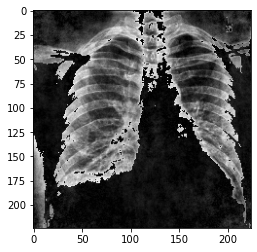

In [85]:
plt.imshow(gen_im, cmap='gray');

In [77]:
zeco_filt = image.copy()
zeco_filt[(zeco_filt<=140)], zeco_filt[zeco_filt>140] = 0, 255

lungs_filt = ~zeco_filt.copy()
lungs_filt[lungs_filt==255] = 1
lungs = image*lungs_filt
#lungs = lungs[28:252, 28:252]
#lungs = top_bottom(lungs)
#lungs = fourier(lungs)

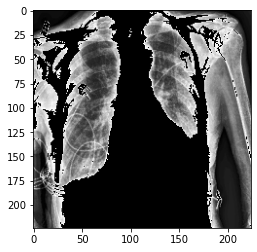

In [78]:
plt.imshow(lungs, cmap='gray');

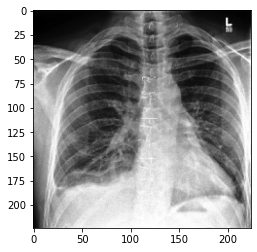

In [86]:
plt.imshow(image, cmap='gray');

In [87]:
image.shape

(224, 224)

In [99]:
lungs.shape

(224, 224)

In [112]:
image_rgb = np.zeros((224, 224, 3)).astype(int)
image_rgb[:,:,0] = top_bottom(lungs)
image_rgb[:,:,1] = image
image_rgb[:,:,2] = new_fourier(cardio)

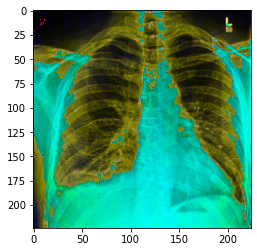

In [113]:
plt.imshow(image_rgb);

# New filter

In [1]:
import cv2

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data/Final Data/clean data/clean_2.csv')

In [3]:
image = cv2.imread('D:\Graduation Project\Data\\'+data.iloc[1000, 0], 0)

In [4]:
image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_AREA)

In [5]:
def top_bottom(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    # Top Hat Transform
    topHat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    # Black Hat Transform
    blackHat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
    #Result
    filtered_img = image + topHat - blackHat

    return filtered_img

In [6]:
f = cv2.dft(image.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shifted = np.fft.fftshift(f)
filtered_real = top_bottom(f_shifted[:,:,1])
filtered_img  = top_bottom(f_shifted[:,:,0])
f_complex = filtered_img*1j + filtered_real
f_filtered_shifted = np.fft.fftshift(f_complex)
inv_img = np.fft.ifft2(f_filtered_shifted)
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

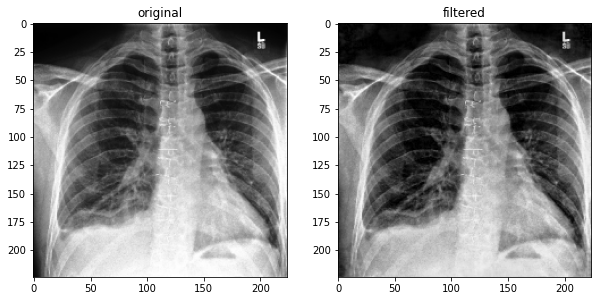

In [7]:
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('original')

plt.subplot(122)
plt.imshow(filtered_img, cmap='gray')
plt.title('filtered');

In [1]:
import pandas as pd 

In [2]:
all_data = pd.read_csv(r'D:\Graduation Project\Data\CheXpert-v1.0-small\train.csv')

In [3]:
all_data.fillna(0, inplace=True)

In [4]:
all_data[['Path', 'Frontal/Lateral', 'Cardiomegaly', 'Edema', 'Consolidation', 
                   'Atelectasis', 'Pleural Effusion']].head()

,Path,Frontal/Lateral,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
0,CheXpert-v1.0-small/train/patient00001/study1/...,Frontal,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Frontal,-1.0,-1.0,-1.0,-1.0,-1.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Frontal,0.0,0.0,-1.0,0.0,0.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Lateral,0.0,0.0,-1.0,0.0,0.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Frontal,0.0,1.0,0.0,0.0,0.0


In [5]:
all_data.iloc[0, 0]

0    CheXpert-v1.0-small/train/patient00001/study1/...
1    CheXpert-v1.0-small/train/patient00002/study2/...
2    CheXpert-v1.0-small/train/patient00002/study1/...
3    CheXpert-v1.0-small/train/patient00002/study1/...
4    CheXpert-v1.0-small/train/patient00003/study1/...
Name: Path, dtype: object

## Frontal from nearest Lateral

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv(r'D:\Graduation Project\Data\CheXpert-v1.0-small\train.csv')

In [3]:
train.loc[:, train.columns[5:]] = train.loc[:, train.columns[5:]].fillna(0)

zeros = ['Cardiomegaly', 'Consolidation', 'Pleural Effusion']
train.loc[:, zeros] = train.loc[:, zeros].replace({-1:0})

ones = ['Edema', 'Atelectasis']
train.loc[:, ones] = train.loc[:, ones].replace({-1:1})

train = train[['Path', 'Frontal/Lateral', 'Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']].copy() 

In [4]:
train['add'] = 'a'

In [5]:
cols = train.columns[2:-1]
train[cols] = train[cols].astype('int')
train[cols] = train[cols].astype('str')

In [6]:
cols = train.columns[2:]
train['Binary'] = train[cols].sum(axis=1)

In [7]:
train.drop(columns=['add'], inplace=True)

In [8]:
train = train[train['Frontal/Lateral']=='Lateral'].copy()

In [9]:
train['Binary'].nunique()

32

In [10]:
train['Binary'].value_counts()

00000a    15081
00001a     3925
00010a     3274
00011a     2395
10000a     1308
01000a     1248
00100a      682
01001a      680
11000a      476
10001a      440
00101a      410
11001a      370
10010a      320
01011a      295
10011a      294
01010a      259
00110a      214
00111a      174
11011a      122
11010a      100
01101a       59
10101a       47
01100a       46
10100a       43
10111a       27
11101a       25
10110a       16
01111a       15
11100a       15
01110a       15
11111a       10
11110a        2
Name: Binary, dtype: int64

In [11]:
data = []
for cat in train['Binary'].unique():
    sub_data = train[train['Binary']==cat].copy()
    
    to_sample = 200 if sub_data.shape[0] > 200 else sub_data.shape[0]
    sampled_data = sub_data.sample(to_sample)
    
    data.append(sampled_data)
    
data = pd.concat(data)

In [12]:
data['Binary'].nunique()

32

In [13]:
data['Binary'].value_counts()

01000a    200
00100a    200
01010a    200
11000a    200
10010a    200
10001a    200
00101a    200
00011a    200
01001a    200
00001a    200
00000a    200
10011a    200
00110a    200
01011a    200
10000a    200
11001a    200
00010a    200
00111a    174
11011a    122
11010a    100
01101a     59
10101a     47
01100a     46
10100a     43
10111a     27
11101a     25
10110a     16
01111a     15
11100a     15
01110a     15
11111a     10
11110a      2
Name: Binary, dtype: int64

In [14]:
data.shape

(4116, 8)

In [15]:
data.head()

,Path,Frontal/Lateral,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion,Binary
78892,CheXpert-v1.0-small/train/patient18944/study3/...,Lateral,0,0,0,0,0,00000a
12586,CheXpert-v1.0-small/train/patient03122/study40...,Lateral,0,0,0,0,0,00000a
3123,CheXpert-v1.0-small/train/patient00755/study3/...,Lateral,0,0,0,0,0,00000a
35946,CheXpert-v1.0-small/train/patient08808/study1/...,Lateral,0,0,0,0,0,00000a
78605,CheXpert-v1.0-small/train/patient18880/study1/...,Lateral,0,0,0,0,0,00000a


In [16]:
data.tail()

,Path,Frontal/Lateral,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion,Binary
88579,CheXpert-v1.0-small/train/patient21257/study5/...,Lateral,0,1,1,1,1,01111a
51054,CheXpert-v1.0-small/train/patient12430/study8/...,Lateral,0,1,1,1,1,01111a
119622,CheXpert-v1.0-small/train/patient28654/study33...,Lateral,0,1,1,1,1,01111a
115983,CheXpert-v1.0-small/train/patient27805/study23...,Lateral,1,1,1,1,0,11110a
133972,CheXpert-v1.0-small/train/patient32150/study4/...,Lateral,1,1,1,1,0,11110a


In [17]:
data.to_csv('data_v3.csv', index=False)

# Filters

In [1]:
import cv2

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data/Final Data/clean data/clean_2.csv')

In [13]:
def old_fourier(image):
    ham = np.hamming(224)[:, None] # 1D hamming
    ham2d = np.sqrt(np.dot(ham, ham.T))
    f = cv2.dft(image.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
    f_shifted = np.fft.fftshift(f)
    f_complex = f_shifted[:,:,0]*1j + f_shifted[:,:,1]
    f_filtered = ham2d * f_complex
    f_filtered_shifted = np.fft.fftshift(f_filtered)
    inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
    filtered_img = np.abs(inv_img)
    filtered_img -= filtered_img.min()
    filtered_img = filtered_img*255 / filtered_img.max()
    filtered_img = filtered_img.astype(np.uint8)

    return filtered_img

def new_fourier(image):
    f = cv2.dft(image.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
    f_shifted = np.fft.fftshift(f)
    filtered_real = top_bottom(f_shifted[:,:,1], 5)
    filtered_img  = top_bottom(f_shifted[:,:,0], 5)
    f_complex = filtered_img*1j + filtered_real
    f_filtered_shifted = np.fft.fftshift(f_complex)
    inv_img = np.fft.ifft2(f_filtered_shifted)
    filtered_img = np.abs(inv_img)
    filtered_img -= filtered_img.min()
    filtered_img = filtered_img*255 / filtered_img.max()
    filtered_img = filtered_img.astype(np.uint8)
    
    return filtered_img

def top_bottom(image, kernel_size):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_size,kernel_size))
    # Top Hat Transform
    topHat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    # Black Hat Transform
    blackHat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
    #Result
    filtered_img = image + topHat - blackHat
    
    return filtered_img

def top_hat(image, kernel_size):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_size,kernel_size))
    # Top Hat Transform
    topHat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    
    filtered_img = image + topHat
    
    return filtered_img

def bottom_hat(image, kernel_size):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_size,kernel_size))
    # Black Hat Transform
    blackHat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
    #Result
    filtered_img = image - blackHat
    
    return filtered_img

def clahe(image):
    clahe = cv2.createCLAHE()
    clahe_im = clahe.apply(image)

    return clahe_im

def hist_eq(image):
    return cv2.equalizeHist(image)

In [14]:
def show_results(image, filtered_image):
    plt.figure(figsize=(10, 10))

    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('original')

    plt.subplot(122)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('filtered');

In [15]:
idx = 1000

image = cv2.imread('D:\Graduation Project\Data\\'+data.iloc[idx, 0], 0)
image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_AREA)

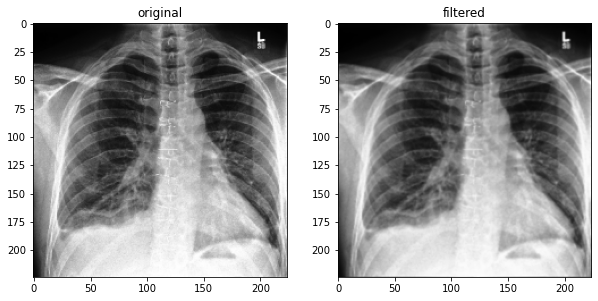

In [16]:
filtered_image = old_fourier(image)

show_results(image, filtered_image)

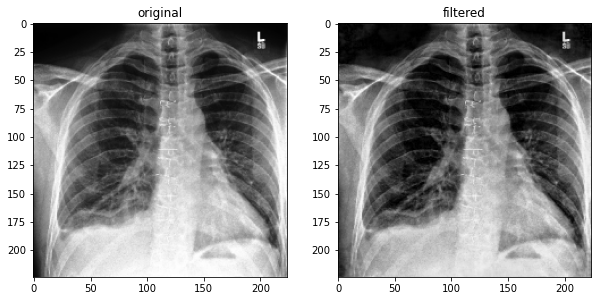

In [17]:
filtered_image = new_fourier(image)

show_results(image, filtered_image)

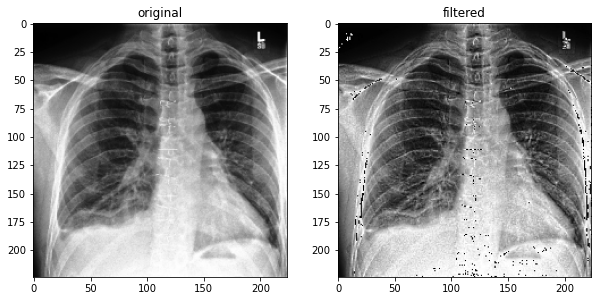

In [27]:
filtered_image = top_bottom(image, 3)

show_results(image, filtered_image)

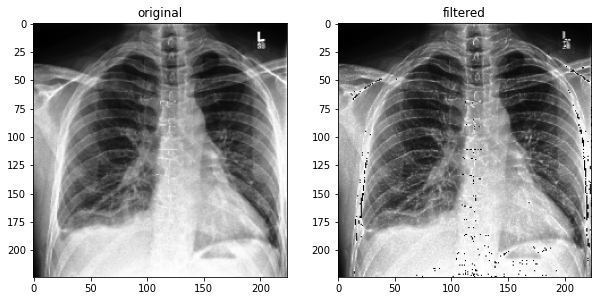

In [28]:
filtered_image = top_hat(image, 3)

show_results(image, filtered_image)

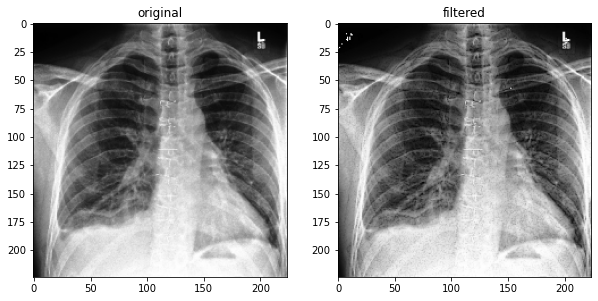

In [29]:
filtered_image = bottom_hat(image, 3)

show_results(image, filtered_image)

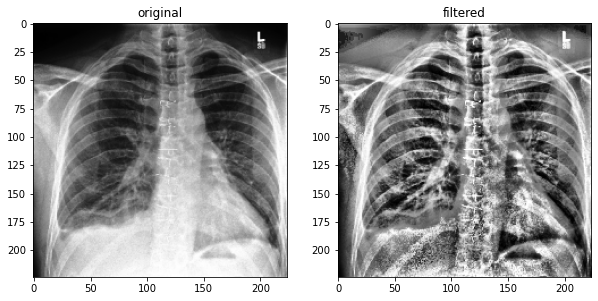

In [33]:
filtered_image = clahe(image)

show_results(image, filtered_image)

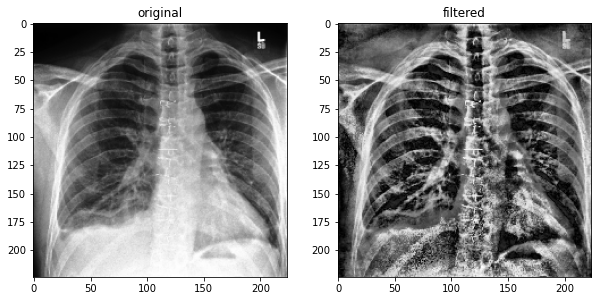

In [34]:
filtered_image = new_fourier(clahe(image))     # proposed filter

show_results(image, filtered_image)

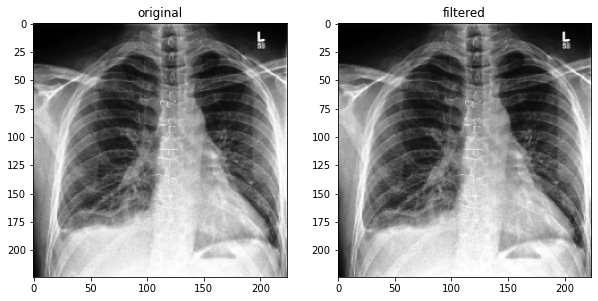

In [31]:
filtered_image = hist_eq(image)

show_results(image, filtered_image)